In [120]:
import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tqdm import tqdm
from sklearn import metrics
from sklearn import model_selection

In [121]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [122]:
data = pd.read_csv("../data/cases_train_processed.csv", parse_dates = True)
model_path = "../models/"

In [139]:
plot_path = "../plots/"

In [141]:
results_path = "../results/"

In [123]:
data

,age,sex,province,country,latitude,longitude,outcome,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,35,male,Herat,Afghanistan,34.341944,62.203056,nonhospitalized,38919.0,1437.0,32576.0,4906.0,Afghanistan,99.976005,3.692284
1,45,male,Herat,Afghanistan,34.341944,62.203056,nonhospitalized,38919.0,1437.0,32576.0,4906.0,Afghanistan,99.976005,3.692284
2,52,male,NaN,Albania,41.153030,20.061890,nonhospitalized,12226.0,358.0,6888.0,4980.0,Albania,424.838418,2.928186
3,46,male,NaN,Albania,41.153030,20.061890,nonhospitalized,12226.0,358.0,6888.0,4980.0,Albania,424.838418,2.928186
4,34,male,NaN,Albania,41.153030,20.061890,nonhospitalized,12226.0,358.0,6888.0,4980.0,Albania,424.838418,2.928186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345466,46,female,Mash East,Zimbabwe,-18.321880,30.594450,recovered,7672.0,225.0,5914.0,1533.0,Zimbabwe,51.618366,2.932742
345467,52,female,Mash East,Zimbabwe,-18.321880,30.594450,deceased,7672.0,225.0,5914.0,1533.0,Zimbabwe,51.618366,2.932742
345468,42,male,Mash West,Zimbabwe,-17.376550,30.192260,recovered,7672.0,225.0,5914.0,1533.0,Zimbabwe,51.618366,2.932742
345469,30,male,Mash West,Zimbabwe,-18.129860,30.150540,recovered,7672.0,225.0,5914.0,1533.0,Zimbabwe,51.618366,2.932742


In [124]:
test_data = pd.read_csv("../data/cases_test_processed.csv", parse_dates = True)
#model_path = "../models/"

In [125]:
test_data

,age,sex,province,country,latitude,longitude,outcome,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,15,male,NaN,Albania,41.15303,20.061890,NaN,12226,358,6888,4980.0,Albania,424.838418,2.928186
1,42,male,Ain Defla,Algeria,36.26520,1.970300,NaN,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
2,45,male,Annaba,Algeria,36.90000,7.766667,NaN,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,32,male,Bejaia,Algeria,36.75000,5.066667,NaN,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
4,48,male,Bejaia,Algeria,36.75000,5.066667,NaN,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46494,52,female,Bulawayo,Zimbabwe,-20.17000,28.580000,NaN,7672,225,5914,1533.0,Zimbabwe,51.618366,2.932742
46495,27,male,Bulawayo Metro,Zimbabwe,-20.17608,28.573630,NaN,7672,225,5914,1533.0,Zimbabwe,51.618366,2.932742
46496,40,female,Harare,Zimbabwe,-17.85000,31.050000,NaN,7672,225,5914,1533.0,Zimbabwe,51.618366,2.932742
46497,24,female,Harare,Zimbabwe,-17.85000,31.050000,NaN,7672,225,5914,1533.0,Zimbabwe,51.618366,2.932742


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345471 entries, 0 to 345470
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  345471 non-null  int64  
 1   sex                  345471 non-null  object 
 2   province             341444 non-null  object 
 3   country              345471 non-null  object 
 4   latitude             345471 non-null  float64
 5   longitude            345471 non-null  float64
 6   outcome              345471 non-null  object 
 7   Confirmed            345471 non-null  float64
 8   Deaths               345471 non-null  float64
 9   Recovered            345471 non-null  float64
 10  Active               345471 non-null  float64
 11  Combined_Key         345471 non-null  object 
 12  Incidence_Rate       345471 non-null  float64
 13  Case-Fatality_Ratio  345471 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 36.9+ MB


In [127]:
data.isnull().sum()

age                       0
sex                       0
province               4027
country                   0
latitude                  0
longitude                 0
outcome                   0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
Combined_Key              0
Incidence_Rate            0
Case-Fatality_Ratio       0
dtype: int64

In [128]:
def categorize_column(data):
    i = 0
    for value in tqdm(data.unique()):
        data.replace(value, i, inplace = True)
        i += 1
    data = data.apply(pd.to_numeric)
    return data

In [129]:
def categorize_outcome(data):
    data = data.map({'nonhospitalized':0, 'deceased':1, 'recovered':2, 'hospitalized':3},na_action ='ignore')
    data = data.apply(pd.to_numeric)
    return data

In [130]:
def cleanup(data):
    data = data.drop(columns=['province', 'country'])
    data['sex'] = categorize_column(data['sex'])
    data['outcome'] = categorize_outcome(data['outcome'])
    data['Combined_Key'] = categorize_column(data['Combined_Key'])
    return data

In [131]:
def create_model_file(gs, filename):
    lines = str(gs.cv_results_)
    line_list = lines.split(',')
    with open(filename, 'w') as f:
        f.writelines(',\n'.join(line_list))

In [132]:
data = cleanup(data)
test_data = cleanup(test_data)

100%|██████████| 409/409 [00:03<00:00, 133.54it/s]


In [133]:
knn_model = KNeighborsClassifier()
parameters = {'n_neighbors': [3,4,5,10,100,1000],'p':[2],'leaf_size':[10,30,50,100],'weights':['uniform']}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scoring = {'Overall_Accuracy': metrics.make_scorer(metrics.accuracy_score),
           'Overall_Recall': metrics.make_scorer(metrics.recall_score, average = 'macro'),
           'F1_Deceased': metrics.make_scorer(metrics.f1_score, labels=[1], average= 'micro'),
           'Recall_Deceased': metrics.make_scorer(metrics.recall_score, labels = [1], average = 'micro') }

X = data.drop(columns='outcome')
y = data['outcome']

#n_scores = cross_val_score(abc, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
gs = GridSearchCV(knn_model, param_grid = parameters, scoring= scoring, cv=cv, n_jobs=-1, refit = 'F1_Deceased')

In [134]:
gs.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [10, 30, 50, 100],
                         'n_neighbors': [3, 4, 5, 10, 100, 1000], 'p': [2],
                         'weights': ['uniform']},
             refit='F1_Deceased',
             scoring={'F1_Deceased': make_scorer(f1_score, labels=[1], average=micro),
                      'Overall_Accuracy': make_scorer(accuracy_score),
                      'Overall_Recall': make_scorer(recall_score, average=macro),
                      'Recall_Deceased': make_scorer(recall_score, labels=[1], average=micro)})

In [135]:
gs.cv_results_

'uniform', 'uniform', 'uniform', 'uniform', 'uniform',
                    'uniform', 'uniform', 'uniform', 'uniform', 'uniform',
                    'uniform', 'uniform', 'uniform', 'uniform'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'leaf_size': 10, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'},
  {'leaf_size': 10, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'},
  {'leaf_size': 10, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'},
  {'leaf_size': 10, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'},
  {'leaf_size': 10, 'n_neighbors': 100, 'p': 2, 'weights': 'uniform'},
  {'leaf_size': 10, 'n_neighbors': 1000, 'p': 2, 'weights': 'uniform'},
  {'leaf_size': 30, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'},
  {'leaf_size': 30, 'n_ne

In [136]:
gs.best_params_

{'leaf_size': 100, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}

In [143]:
knn_file = results_path + "knn_file.txt"
create_model_file(gs, knn_file)

In [152]:
def plot_overall_accuracy(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_Overall_Accuracy']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_Overall_Accuracy']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Overall Accuracy Scores", fontsize=12, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=9, fontweight='bold')
    ax.set_ylabel('CV Average Score', fontsize=9, fontweight='bold')
    ax.legend(loc="best", fontsize=8)
    ax.grid('on')
    plt.savefig(plot_path+'knn_overall_accuracy.png')     

In [153]:
def plot_overall_recall(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_Overall_Recall']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_Overall_Recall']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Overall Recall Scores", fontsize=12, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=9, fontweight='bold')
    ax.set_ylabel('CV Average Score', fontsize=9, fontweight='bold')
    ax.legend(loc="best", fontsize=8)
    ax.grid('on')
    plt.savefig(plot_path+'knn_overall_recall.png') 

In [154]:
def plot_F1_deceased(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_F1_Deceased']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_F1_Deceased']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("F1 Deceased Scores", fontsize=12, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=9, fontweight='bold')
    ax.set_ylabel('CV Average Score', fontsize=9, fontweight='bold')
    ax.legend(loc="best", fontsize=8)
    ax.grid('on')
    plt.savefig(plot_path+'knn_F1_deceased.png')  

In [155]:
def plot_recall_deceased(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_Recall_Deceased']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_Recall_Deceased']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Recall Deceased Scores", fontsize=12, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=9, fontweight='bold')
    ax.set_ylabel('CV Average Score', fontsize=9, fontweight='bold')
    ax.legend(loc="best", fontsize=8)
    ax.grid('on')
    plt.savefig(plot_path+'knn_F1_recall.png')    



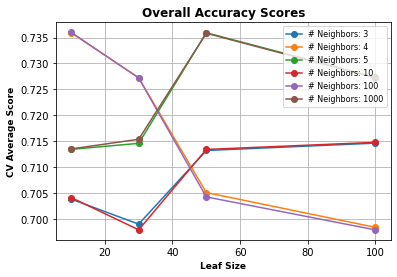

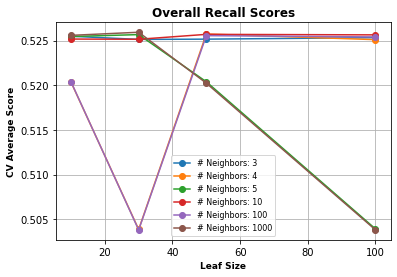

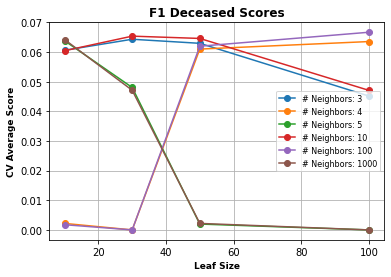

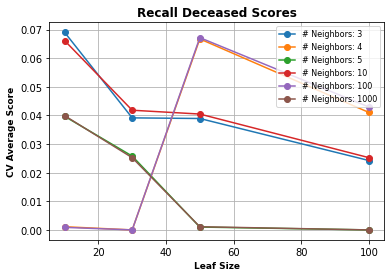

In [160]:
n_nbrs = [3,4,5,10,100,1000]
leaf_sz = [10,30,50,100]
plot_overall_accuracy(gs.cv_results_, leaf_sz, n_nbrs, 'Leaf Size', '# Neighbors')
plot_overall_recall(gs.cv_results_, leaf_sz, n_nbrs, 'Leaf Size', '# Neighbors')
plot_F1_deceased(gs.cv_results_, leaf_sz, n_nbrs, 'Leaf Size', '# Neighbors')
plot_recall_deceased(gs.cv_results_, leaf_sz, n_nbrs, 'Leaf Size', '# Neighbors')